## Bezier Curves

Summary for 3rd order Bezier Curves
* Each pieve of a Bezier curve is determined by four points $P_0(x_1,y_1), P_1(x_2,y_2), P_2(x_3,y_3), P_3(x_4,y_4)$
    * the first and last points are the endpoints while the middle two are the control points
* the curve leaves $(x_1,y_1)$ along the tangent direction $(x_2-x_1,y_2-y_1)$ and ends at $(x_4,y_4)$ along the tangent direction $(x_4-x_3,y_4-y_3)$.
* The equations that accomplish this are expressed as a parametric curve $(x(t),y(t)) \text{ for } 0 \leq t \leq 1$.

* Given the endpoints and control points, set: $\\$
    $b_x = 3(x_2 - x_1) \\ c_x = 3(x_3-x_2) - b_x \\ d_x = x_4-x_1-b_x-c_x \\$
    $b_y = 3(y_2 - y_1) \\ c_y = 3(y_3-y_2) - b_y \\ d_y = y_4-y_1-b_y-c_y \\$
* The Bezier curve is defined for $0 \leq t \leq 1$ by $\\$
    $x(t) = x_1 + b_xt + c_xt^2 + d_xt^3 \\ y(t) = y_1 + b_yt + c_yt^2 + d_yt^3$


### Computation
#### Example 
Find the Bezier curve $(x(t),y(t))$ through the points $(x,y) = (1,1) \text{ and } (2,2)$ with control points $(1,3) \text{ and } (3,3)$.

1. Outline of the code
    * Plot four given points
    * Plot tangent direction
2. Construct a dummy function 
    * input four points
    * Output parametric curves: a simple line
3. Change dummy to Bezier 
    * Translate algoritm into code
4. Check the correctness
    * Plot the result
    * Compare the with characterization

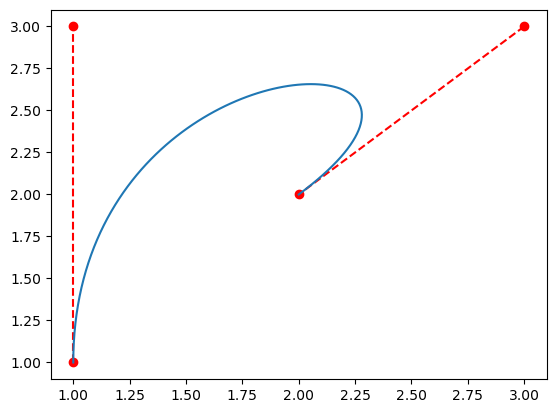

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# create a dummy function
def Bezier(pt):
    '''
    Return Bezier curve

    Input:
        pt: 2D array of shape (4,2)
            1st and 4th row are endpoints, 2nd and 3rd are control points
    Output: 
        2D arra of shape (2, 100)
            1st row is x values and 2nd row is y values of Bezier Curve
    Note: when plotting the curve, you can use the unpacking operator *
    '''


    # get x, y points for pt
    x = pt[:, 0]
    y = pt[:, 1]

    # set values (bx, cx, dx, by, cy, dy)
    bx = 3.*(x[1] - x[0])
    cx = 3.*(x[2] - x[1]) - bx
    dx = x[3] - x[0] - bx - cx
    
    by = 3.*(y[1] - y[0])
    cy = 3.*(y[2] - y[1]) - by
    dy = y[3] - y[0] - by - cy

    # parametric curve
    t = np.linspace(0, 1, 100)
    x = x[0] + bx*t + cx*t*t + dx*t*t*t
    y = y[0] + by*t + cy*t*t + dy*t*t*t

    return np.vstack((x, y))

# create the points
pt = np.array([[1., 1.],[1., 3.],[3., 3.],[2., 2.]])

# plot the points
plt.plot(pt[:, 0], pt[:, 1], 'ro')
plt.plot(pt[:2,0], pt[:2,1], 'r--', pt[2:,0], pt[2:,1], 'r--')


curve = Bezier(pt)
# plt.plot(curve[0, :], curve[1, :], 'b*')
plt.plot(*curve) # utilizes unpacking
plt.show()